In [1]:
import numpy as np, humanfriendly as hf
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def get_time(time):
    return hf.format_timespan(time, detailed=True)

In [3]:
def find_misses(test, pred):
    '''
    找到预测不正确的点index
    '''
    return [i for i, row in enumerate(test) if row != pred[i]]


In [4]:
# 载入数据，分割数据
X_file = 'data/X_mnist'
y_file = 'data/y_mnist'
X = np.load('data/X_mnist.npy')
y = np.load('data/y_mnist.npy')
X = X.astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [5]:
rf = RandomForestClassifier(random_state=0,n_estimators=100)
rf_name = rf.__class__.__name__

In [6]:
start = time.perf_counter()
rf.fit(X_train, y_train)
end = time.perf_counter()
elapsed_ls = end - start
timer = get_time(elapsed_ls)
timer

'37 seconds, 219 milliseconds, 733 microseconds and 500 nanoseconds'

In [7]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print ('\'test\' accuracy:', accuracy)
print (rf_name + ' timer:', timer)
cm = confusion_matrix(y_test, y_pred)

'test' accuracy: 0.9687428571428571
RandomForestClassifier timer: 37 seconds, 219 milliseconds, 733 microseconds and 500 nanoseconds


Text(33.0, 0.5, 'predicted value')

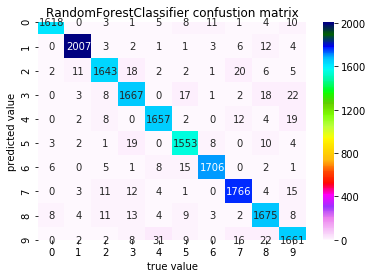

In [8]:
plt.figure(1)
ax = plt.axes()
sns.heatmap(cm.T, annot=True, fmt="d",cmap='gist_ncar_r', ax=ax)
ax.set_title(rf_name + ' confustion matrix')
plt.xlabel('true value')
plt.ylabel('predicted value')

In [9]:
et = ExtraTreesClassifier(random_state=0, n_estimators=100)
et_name = et.__class__.__name__
et_name

'ExtraTreesClassifier'

In [10]:
start = time.perf_counter()
et.fit(X_train, y_train)
end = time.perf_counter()
elapsed_ls = end - start
timer = get_time(elapsed_ls)
timer

'37 seconds, 275 milliseconds, 59 microseconds and 600 nanoseconds'

In [11]:
y_pred = et.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print ('\'test\' accuracy:', accuracy)
print (et_name + ' timer:', timer)
cm = confusion_matrix(y_test, y_pred)

'test' accuracy: 0.9727428571428571
ExtraTreesClassifier timer: 37 seconds, 275 milliseconds, 59 microseconds and 600 nanoseconds


Text(33.0, 0.5, 'predicted value')

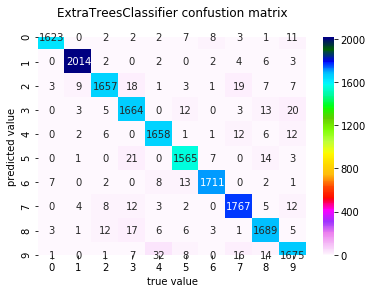

In [12]:
plt.figure(2)
ax = plt.axes()
sns.heatmap(cm.T, annot=True, fmt="d",cmap='gist_ncar_r', ax=ax)
ax.set_title(et_name + ' confustion matrix\n')
plt.xlabel('true value')
plt.ylabel('predicted value')

In [13]:
indx = find_misses(y_test, y_pred)
print(indx[:5])
print ('pred', 'actual')
misses = [(y_pred[row], y_test[row], i) for i, row in enumerate(indx)]
[print (row[0], '  ', row[1]) for i, row in enumerate(misses) if i < 10]

[20, 66, 194, 224, 265]
pred actual
3.0    9.0
7.0    3.0
4.0    9.0
2.0    3.0
3.0    9.0
3.0    2.0
8.0    4.0
6.0    5.0
9.0    7.0
8.0    3.0


[None, None, None, None, None, None, None, None, None, None]

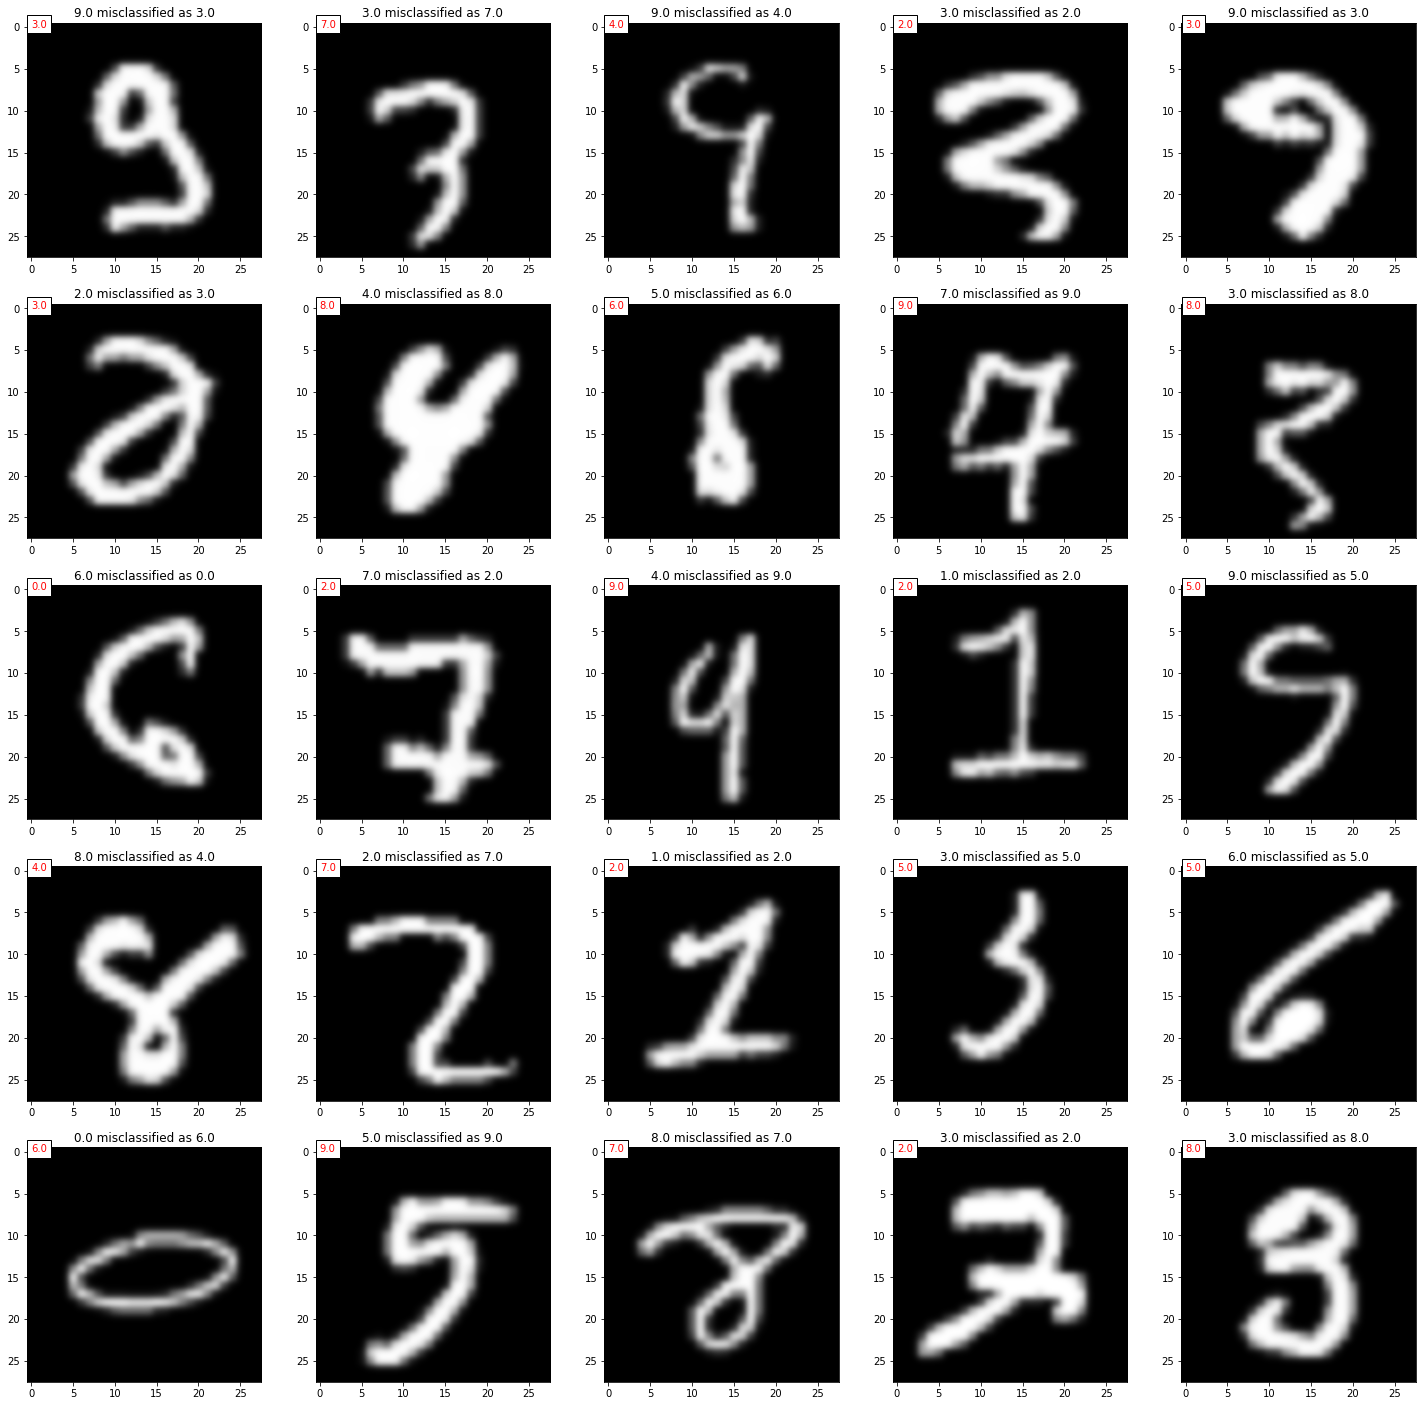

In [31]:
fig = plt.figure(3,figsize=(25,25))# 设置画布大小

for i in range(25):
    '''
    打印前25的错误情况
    '''
    img_act = y_test[indx[i]]
    img_pred = y_pred[indx[i]]
    text = str(img_pred)
    ax = fig.add_subplot(5,5,i+1)
    test_images = X_test.reshape(-1, 28, 28)
    ax.imshow(test_images[indx[i]], cmap='gray',interpolation='gaussian')
    plt.text(0, 0.05, text, color='r', bbox=dict(facecolor='white'))
    title = str(img_act) + ' misclassified as ' + text
    plt.title(title)